In [220]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


%matplotlib inline 

In [221]:
data_location = "Data/properati_final.csv"

data = pd.read_csv(data_location, sep=",", encoding="UTF-8")

data.columns


Index(['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'lat', 'lon', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'rooms', 'properati_url', 'parrilla',
       'quincho', 'patio', 'balcon', 'pileta', 'cochera', 'amenities',
       'ciudad', 'barrio', 'subway_distance', 'precio_m2',
       'segmento_precio_m2'],
      dtype='object')

In [222]:
mask = data.state_name == 'Capital Federal'
data = data[mask]

In [223]:
#voy a analizar la relación entre el precio y la distancia a los subtes

In [224]:
x_is = data.subway_distance
y_is =  data.price_aprox_usd

x_bar = np.mean(x_is)

y_bar = np.mean(y_is)
x_is_minus_x_bar = x_is - x_bar

y_is_minus_y_bar = y_is - x_bar
y_is_minus_y_bar

denom_1 = x_is_minus_x_bar ** 2
denom = np.sum(denom_1)

num_1 = x_is_minus_x_bar * y_is_minus_y_bar
num = np.sum(num_1)

beta_1_hat = num / denom
beta_1_hat

-1321.9131598455872

<Figure size 720x432 with 0 Axes>

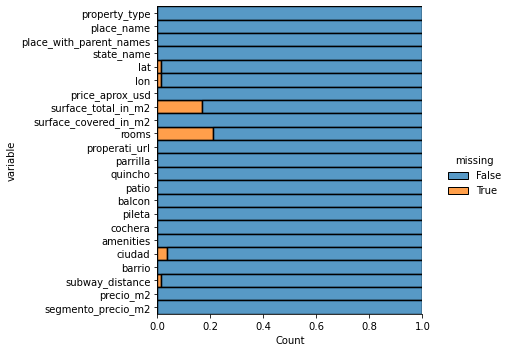

In [225]:
plt.figure(figsize=(10,6))
sns.displot(data=data.isna().melt(value_name="missing"), y="variable", hue="missing", multiple="fill", aspect=1.25)

In [226]:
data.subway_distance.isnull().sum()

309

In [227]:
data.dropna(subset = ["surface_covered_in_m2"], inplace=True)

In [228]:
import statsmodels.api as sm

X_t = np.array(data.surface_covered_in_m2, ndmin=2)
X = np.transpose(X_t)
y = data.price_aprox_usd

# Tenemos que agregar explícitamente a una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:        price_aprox_usd   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                 1.272e+04
Date:                Tue, 01 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:04:55   Log-Likelihood:            -3.3718e+05
No. Observations:               24069   AIC:                         6.744e+05
Df Residuals:                   24067   BIC:                         6.744e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.584e+05   2146.913     73.766      0.0

In [229]:
data.dropna(subset = ["rooms"], inplace=True)
data.dropna(subset = ["surface_total_in_m2"], inplace=True)


X_t = np.array(data.surface_total_in_m2, ndmin=2)
X = np.transpose(X_t)
y = data.rooms

# Tenemos que agregar explícitamente a una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                  rooms   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3003
Date:                Tue, 01 Feb 2022   Prob (F-statistic):              0.584
Time:                        23:04:55   Log-Likelihood:                -77320.
No. Observations:               15453   AIC:                         1.546e+05
Df Residuals:                   15451   BIC:                         1.547e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0896      0.302     10.241      0.0